**Imports**







In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00


In [3]:
!pip install --upgrade nbformat


In [4]:
! pip install lightgbm


In [5]:
!pip install xgboost imbalanced-learn


In [6]:
!pip install plotly --quiet


In [7]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [8]:
!pip install lightgbm

In [9]:
! pip install streamlit

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score,f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import lightgbm as lgb
import warnings
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

import streamlit as st

from sklearn.datasets import load_iris

import mlflow
import mlflow.sklearn


import warnings
warnings.filterwarnings("ignore")

**Dataset Description**

In [12]:
df = pd.read_csv(r"diabetic_data.csv")

In [13]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535 entries, 0 to 5534
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              5535 non-null   int64  
 1   patient_nbr               5535 non-null   int64  
 2   race                      5535 non-null   object 
 3   gender                    5535 non-null   object 
 4   age                       5535 non-null   object 
 5   weight                    5535 non-null   object 
 6   admission_type_id         5535 non-null   int64  
 7   discharge_disposition_id  5535 non-null   int64  
 8   admission_source_id       5535 non-null   int64  
 9   time_in_hospital          5535 non-null   int64  
 10  payer_code                5535 non-null   object 
 11  medical_specialty         5535 non-null   object 
 12  num_lab_procedures        5535 non-null   int64  
 13  num_procedures            5535 non-null   int64  
 14  num_medi

In [16]:
print(df.isnull().sum())

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
weight                         0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                     0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                1
number_outpatient              1
number_emergency               1
number_inpatient               1
diag_1                         1
diag_2                         1
diag_3                         1
number_diagnoses               1
max_glu_serum               5100
A1Cresult                   4440
metformin                      1
repaglinide                    1
nateglinide                    1
chlorpropamide                 1
glimepiride                    1
acetohexamide                  1
glipizide 

In [17]:
df.shape

(5535, 50)

In [18]:

df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,5.535000e+03,5.535000e+03,5535.000000,5535.000000,5535.000000,5535.000000,5535.000000,5535.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,1.665572e+07,2.514142e+07,2.639024,4.619512,6.486902,4.677507,47.550678,1.518338,14.780810,0.053849,0.028731,0.410553,6.752620
std,8.185705e+06,3.399057e+07,1.971461,7.244363,5.000195,3.125820,18.005729,1.781520,7.747496,0.488056,0.253809,0.930945,2.075754
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,9.568929e+06,1.721516e+06,1.000000,1.000000,2.000000,2.000000,36.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.000000
50%,1.772083e+07,6.048450e+06,2.000000,1.000000,7.000000,4.000000,48.000000,1.000000,13.000000,0.000000,0.000000,0.000000,7.000000
75%,2.410931e+07,3.248072e+07,5.000000,5.000000,7.000000,6.000000,60.000000,3.000000,19.000000,0.000000,0.000000,0.000000,9.000000
max,2.860530e+07,1.151968e+08,6.000000,25.000000,20.000000,14.000000,105.000000,6.000000,62.000000,12.000000,9.000000,15.000000,9.000000


**Data Cleaning**







In [20]:
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)



In [21]:
# Missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100
print(missing_percent.sort_values(ascending=False))




payer_code                  100.000000
weight                       97.380307
max_glu_serum                92.140921
A1Cresult                    80.216802
medical_specialty            31.779584
diag_3                        3.306233
race                          2.005420
diag_2                        0.686540
diag_1                        0.108401
number_emergency              0.018067
number_outpatient             0.018067
num_medications               0.018067
number_inpatient              0.018067
number_diagnoses              0.018067
metformin                     0.018067
repaglinide                   0.018067
nateglinide                   0.018067
chlorpropamide                0.018067
glimepiride                   0.018067
acetohexamide                 0.018067
glipizide                     0.018067
glyburide                     0.018067
tolbutamide                   0.018067
pioglitazone                  0.018067
rosiglitazone                 0.018067
acarbose                 

In [22]:

df.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)


In [23]:

df['race'].fillna('Unknown', inplace=True)
df['diag_1'].fillna('Unknown', inplace=True)
df['diag_2'].fillna('Unknown', inplace=True)
df['diag_3'].fillna('Unknown', inplace=True)


In [24]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535 entries, 0 to 5534
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              5535 non-null   int64  
 1   patient_nbr               5535 non-null   int64  
 2   race                      5535 non-null   object 
 3   gender                    5535 non-null   object 
 4   age                       5535 non-null   object 
 5   admission_type_id         5535 non-null   int64  
 6   discharge_disposition_id  5535 non-null   int64  
 7   admission_source_id       5535 non-null   int64  
 8   time_in_hospital          5535 non-null   int64  
 9   num_lab_procedures        5535 non-null   int64  
 10  num_procedures            5535 non-null   int64  
 11  num_medications           5534 non-null   float64
 12  number_outpatient         5534 non-null   float64
 13  number_emergency          5534 non-null   float64
 14  number_i

In [25]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [26]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n{df[col].value_counts()}")


Unique values in 'race':
race
Caucasian          3982
AfricanAmerican    1248
Unknown             111
Hispanic             87
Other                83
Asian                24
Name: count, dtype: int64

Unique values in 'gender':
gender
Female    2979
Male      2556
Name: count, dtype: int64

Unique values in 'age':
age
[70-80)     1449
[60-70)     1172
[50-60)     1052
[80-90)      626
[40-50)      619
[30-40)      269
[10-20)      113
[90-100)      96
[20-30)       93
[0-10)        46
Name: count, dtype: int64

Unique values in 'diag_1':
diag_1
414       599
428       439
786       242
410       232
486       139
         ... 
451         1
217         1
250.53      1
442         1
913         1
Name: count, Length: 385, dtype: int64

Unique values in 'diag_2':
diag_2
250      366
428      340
276      336
411      250
427      231
        ... 
592        1
598        1
336        1
275        1
250.1      1
Name: count, Length: 354, dtype: int64

Unique values in 'diag_3':
diag_3
250

In [27]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [28]:
print("\nUnique values in 'readmitted':")

print(df['readmitted'].unique())



Unique values in 'readmitted':
['NO' '>30' '<30' nan]


In [29]:
df['readmitted'].map({'NO': 0, '>30': 0, '<=30': 1})

,readmitted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5530,0.0
5531,0.0
5532,0.0
5533,0.0


In [30]:
# Mapping effectiveness based on correct unique value '<30'
df['effectiveness'] = df['readmitted'].map({
    'NO': 0,
    '>30': 0,
    '<30': 1
})

In [31]:
# Check result
print(df[['readmitted', 'effectiveness']].head(10))
print("\nEffectiveness value counts:")
print(df['effectiveness'].value_counts(dropna=False))

  readmitted  effectiveness
0         NO            0.0
1        >30            0.0
2         NO            0.0
3         NO            0.0
4         NO            0.0
5        >30            0.0
6         NO            0.0
7        >30            0.0
8         NO            0.0
9         NO            0.0

Effectiveness value counts:
effectiveness
0.0    4926
1.0     608
NaN       1
Name: count, dtype: int64


**Data Visualization**

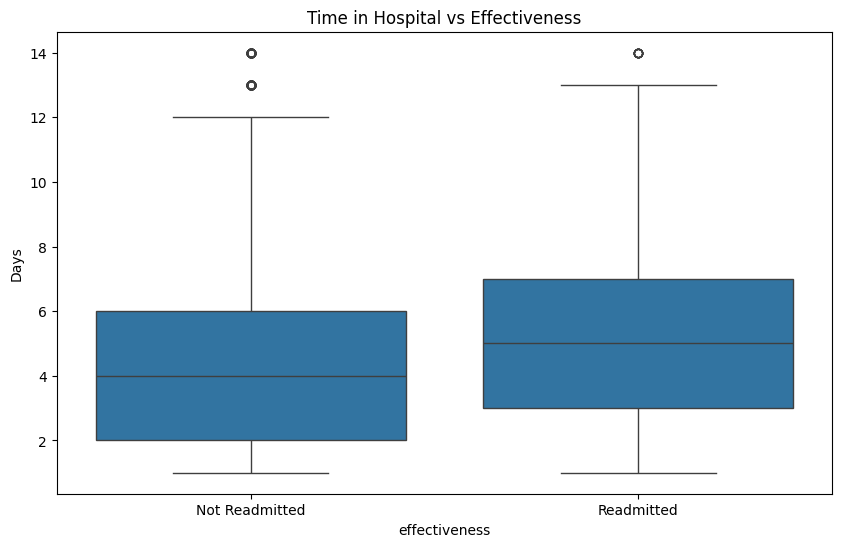

In [32]:


# Encode effectiveness temporarily
df_temp = df.copy()
df_temp['effectiveness_label'] = df_temp['effectiveness'].map({0: 'Not Readmitted', 1: 'Readmitted'})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_temp, x='effectiveness', y='time_in_hospital')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.title('Time in Hospital vs Effectiveness')
plt.ylabel('Days')
plt.show()

effectiveness
0.0    4926
1.0     608
Name: count, dtype: int64


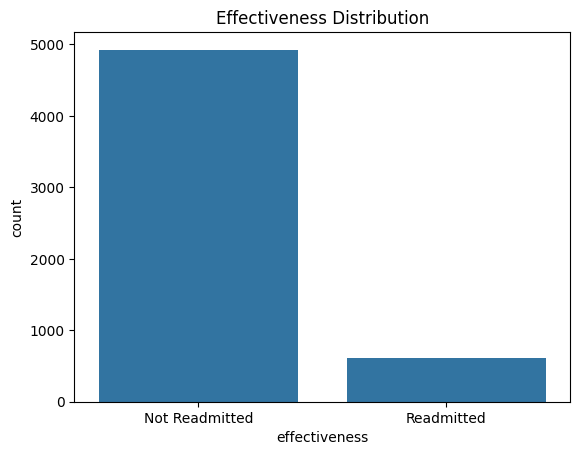

In [33]:
# Check distribution
print(df_temp['effectiveness'].value_counts())
sns.countplot(data=df_temp, x='effectiveness')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.title('Effectiveness Distribution')
plt.show()


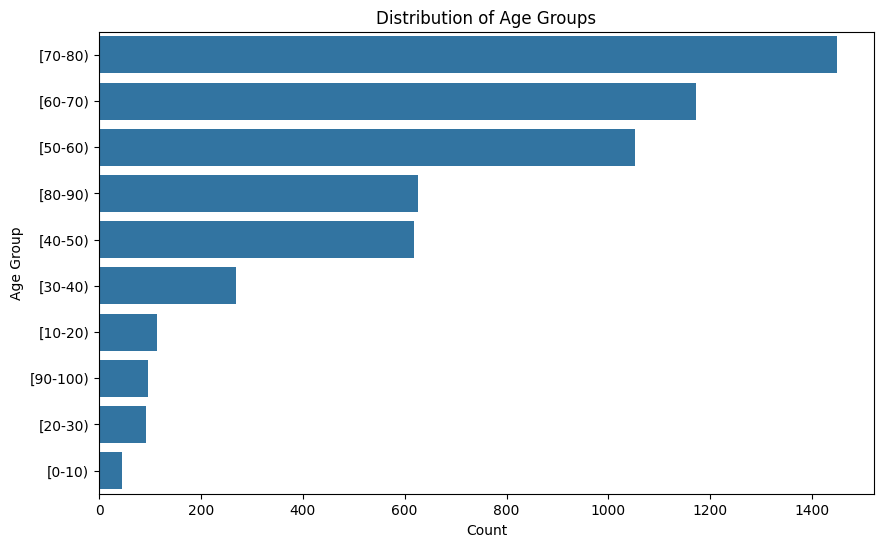

In [34]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='age', order=df['age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

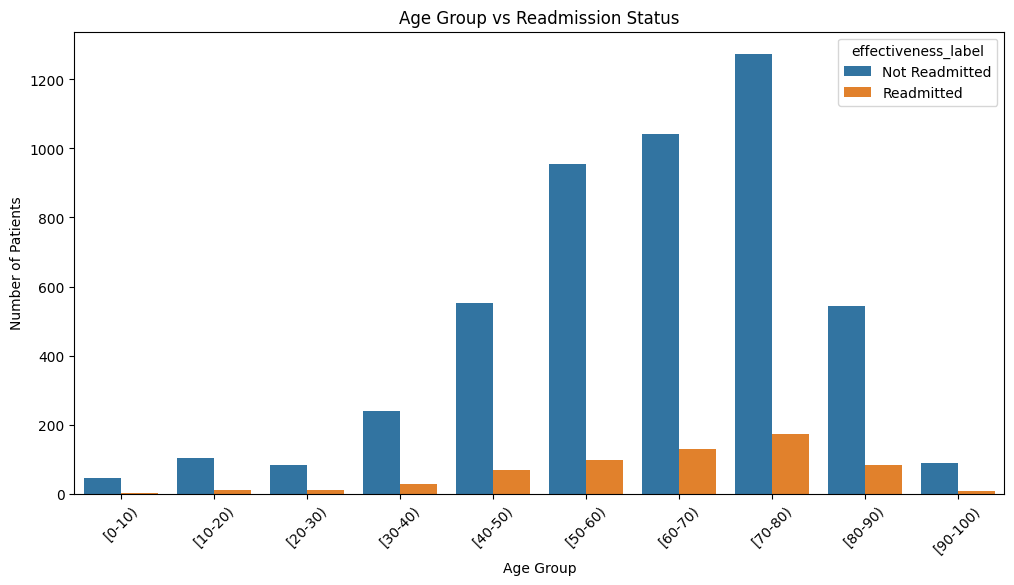

In [35]:
df_temp['effectiveness_label'] = df_temp['effectiveness'].map({0: 'Not Readmitted', 1: 'Readmitted'})
plt.figure(figsize=(12, 6))

# Countplot to show counts per age group and readmission status
sns.countplot(data=df_temp, x='age', hue='effectiveness_label')

# Add title and labels
plt.title('Age Group vs Readmission Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')

# Rotate x labels if needed (age groups like [30-40) etc.)
plt.xticks(rotation=45)

plt.show()

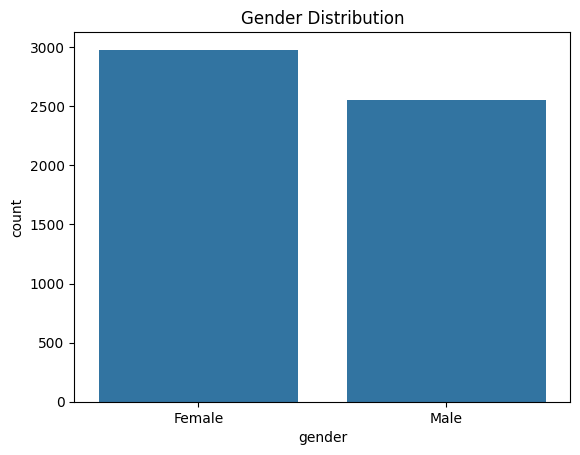

In [36]:
# Plot gender
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

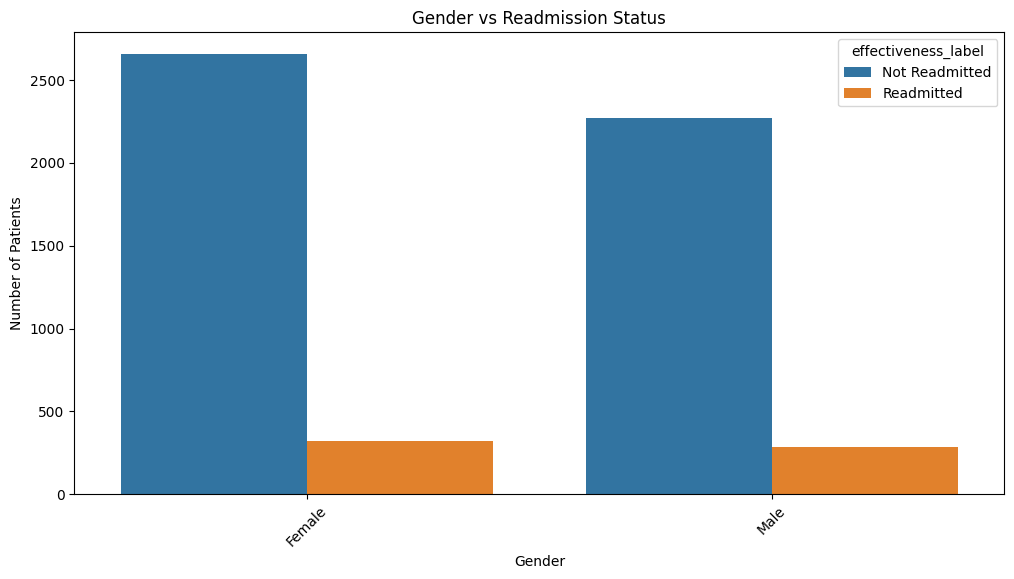

In [37]:
df_temp['effectiveness_label'] = df_temp['effectiveness'].map({0: 'Not Readmitted', 1: 'Readmitted'})
plt.figure(figsize=(12, 6))

# Countplot to show counts per age group and readmission status
sns.countplot(data=df_temp, x='gender', hue='effectiveness_label')

# Add title and labels
plt.title('Gender vs Readmission Status')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

# Rotate x labels if needed (age groups like [30-40) etc.)
plt.xticks(rotation=45)

plt.show()

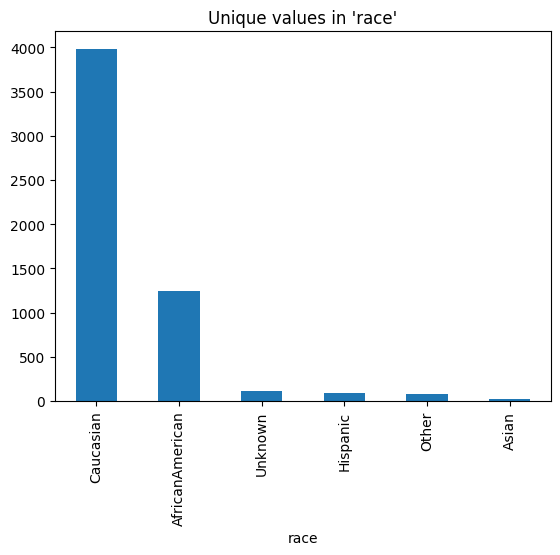

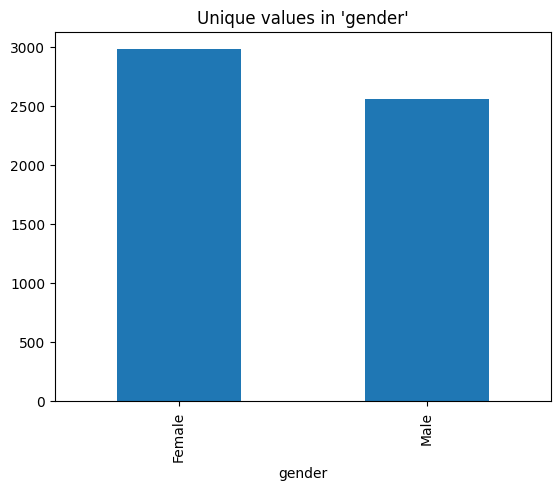

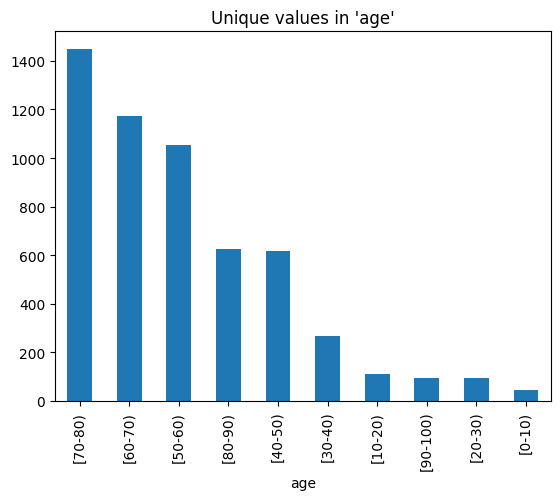

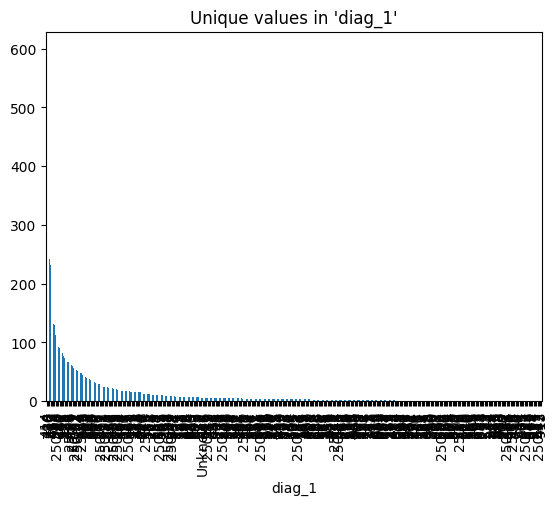

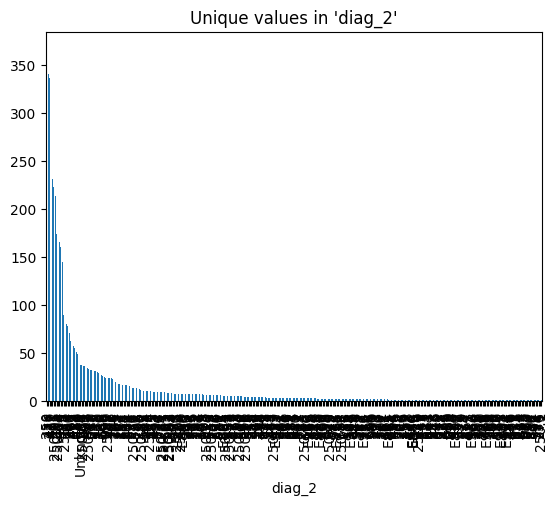

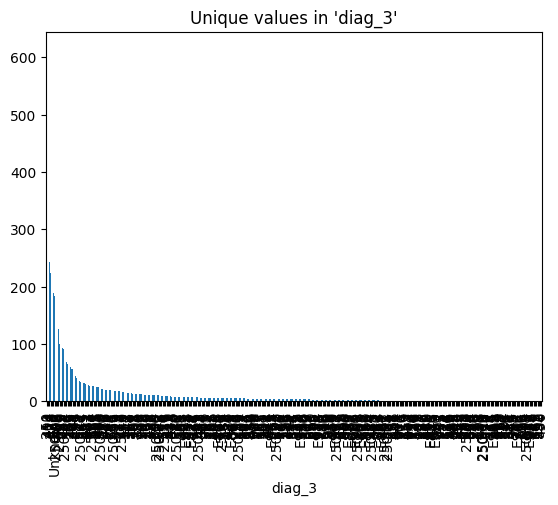

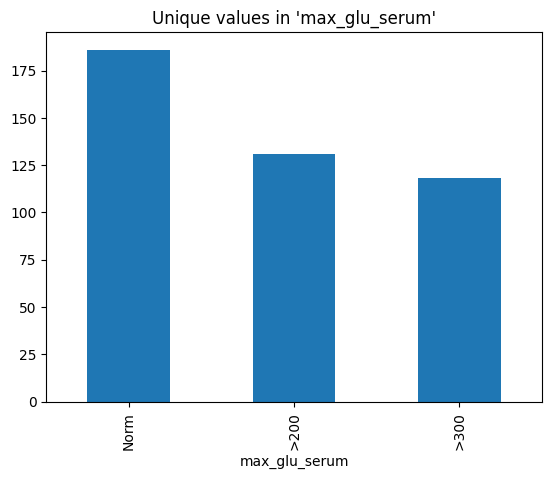

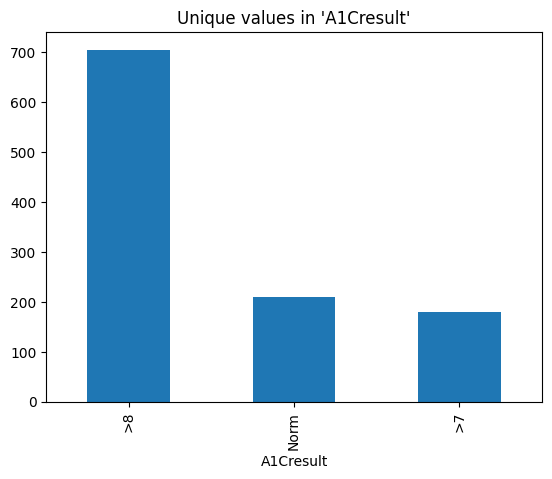

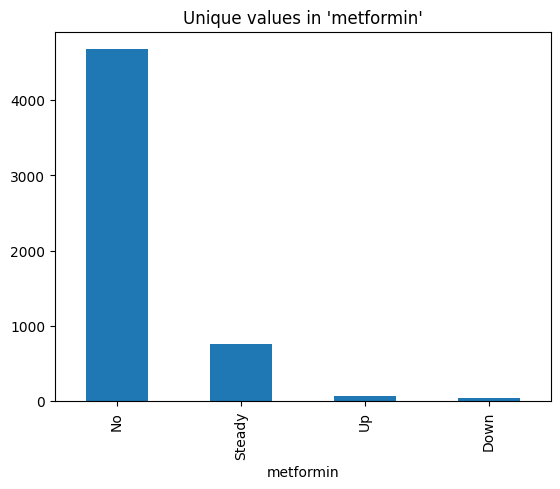

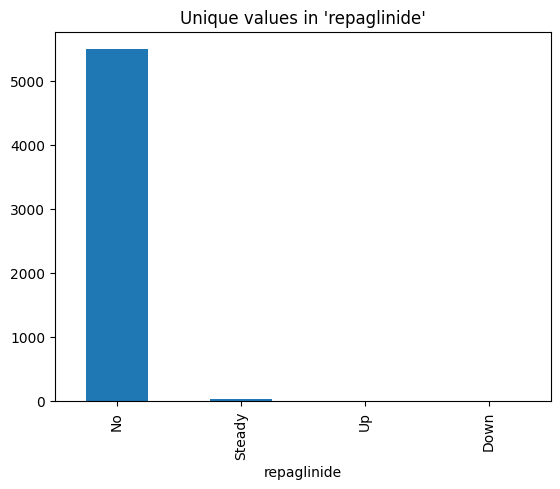

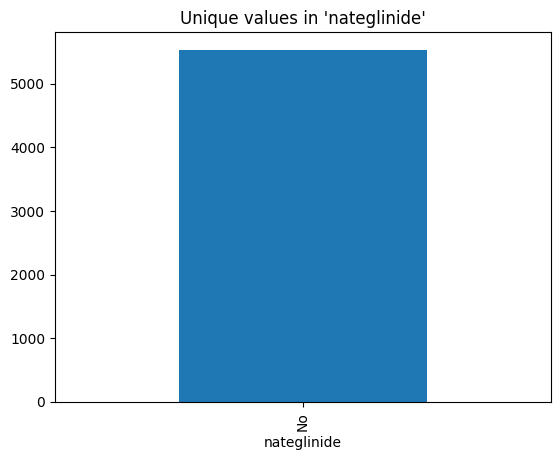

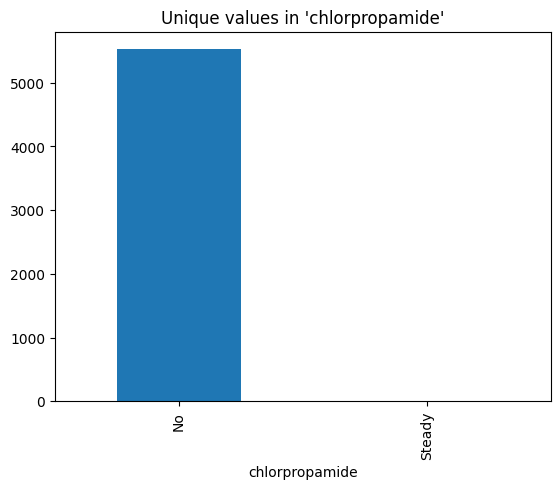

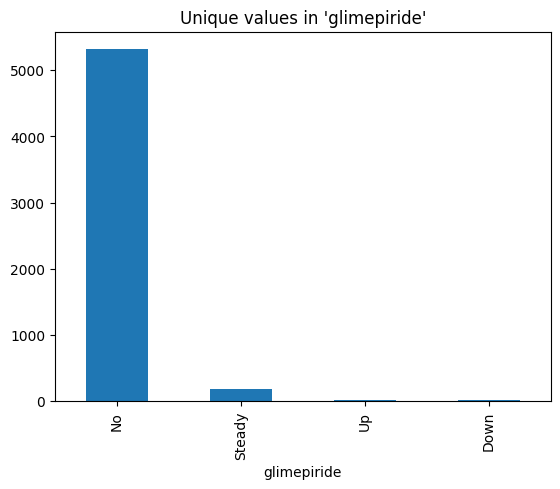

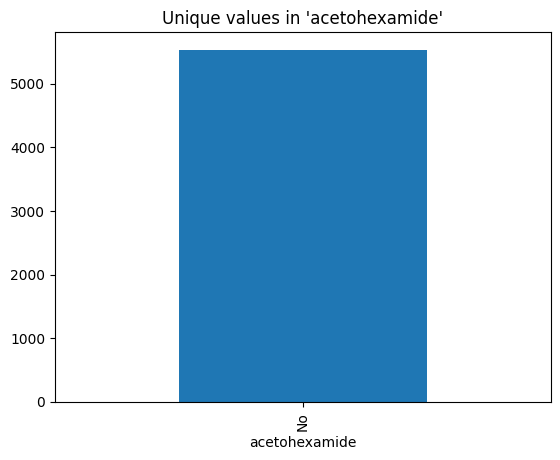

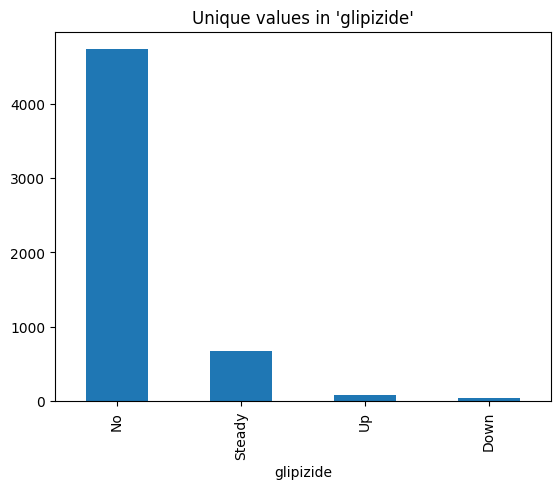

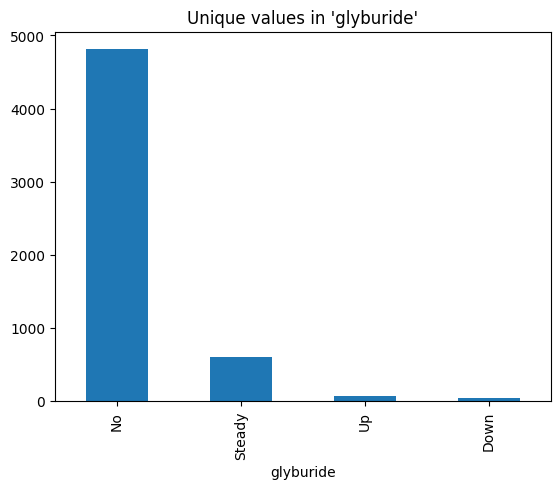

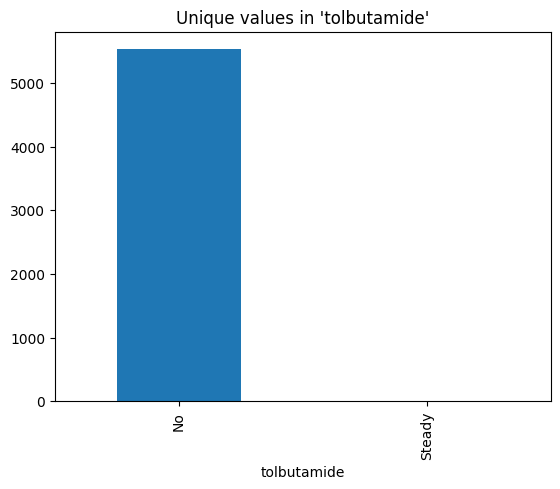

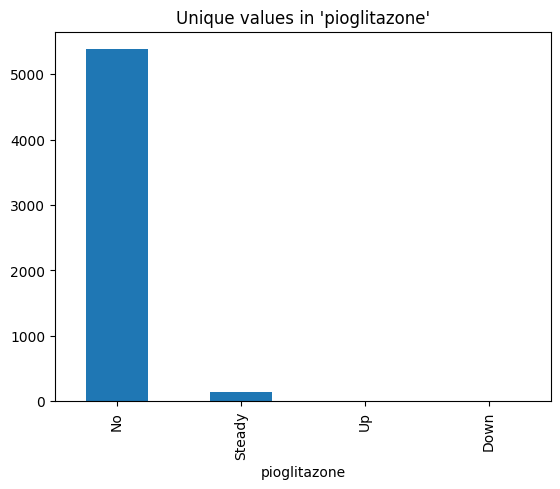

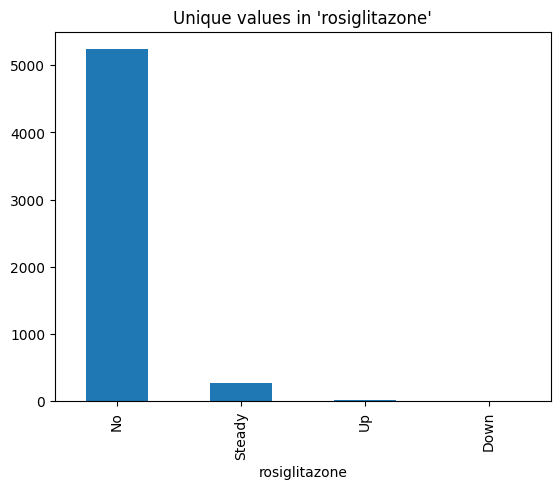

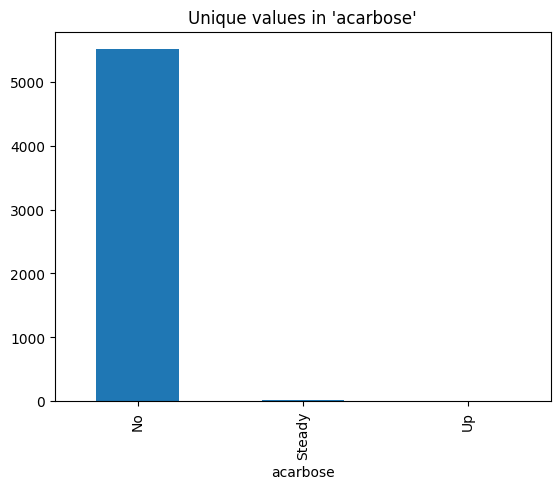

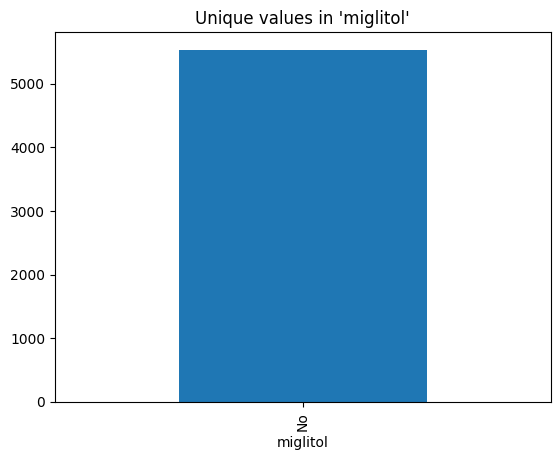

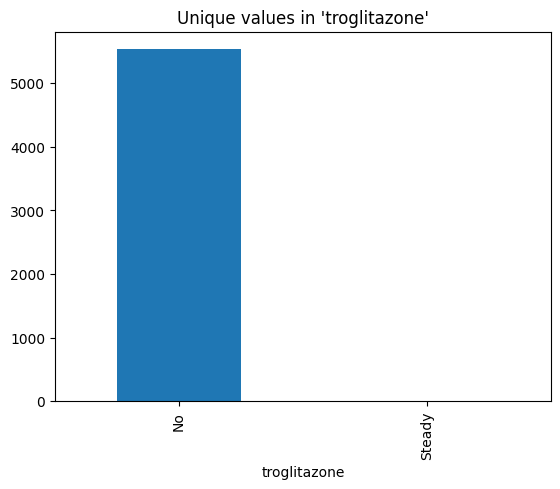

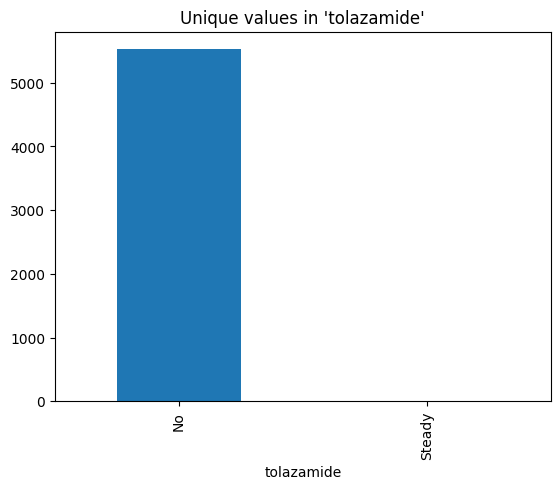

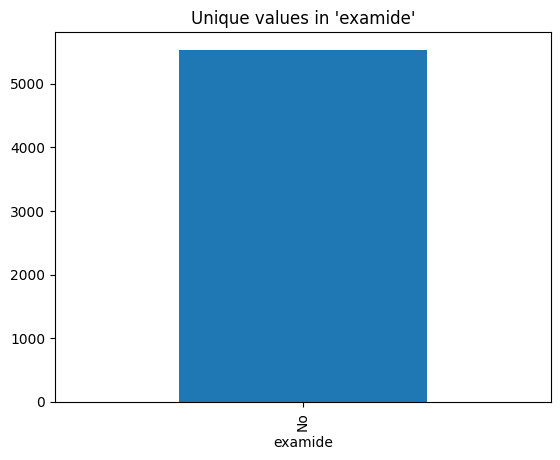

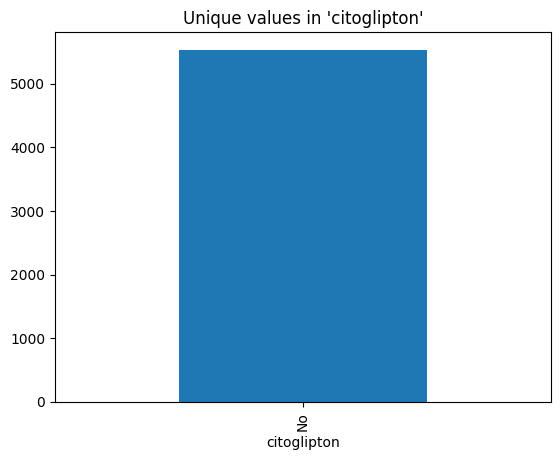

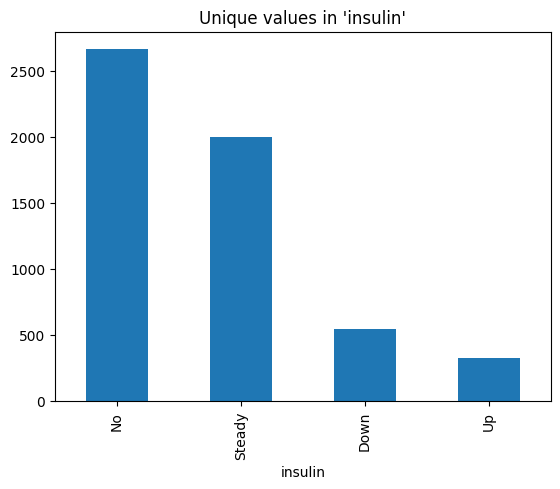

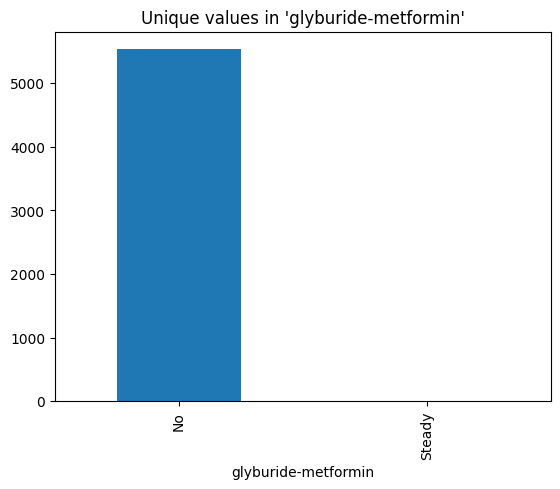

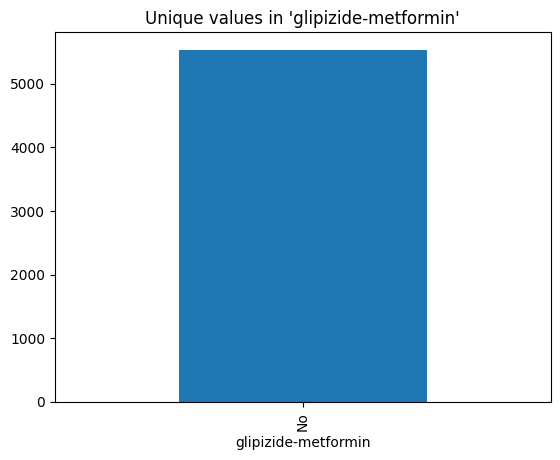

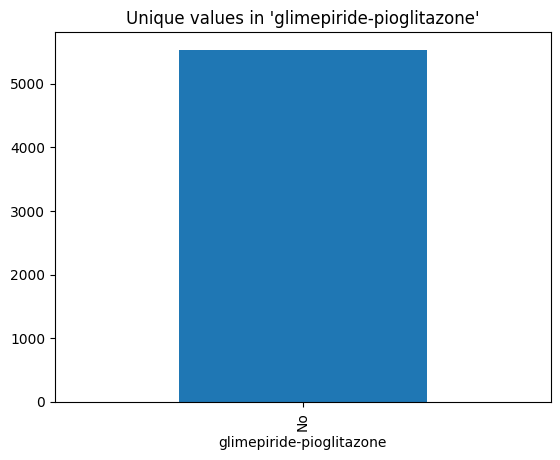

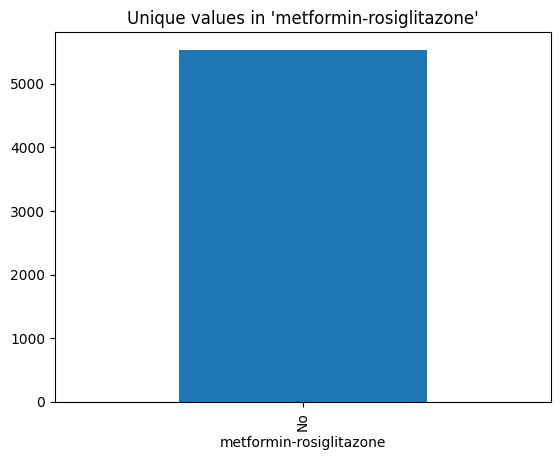

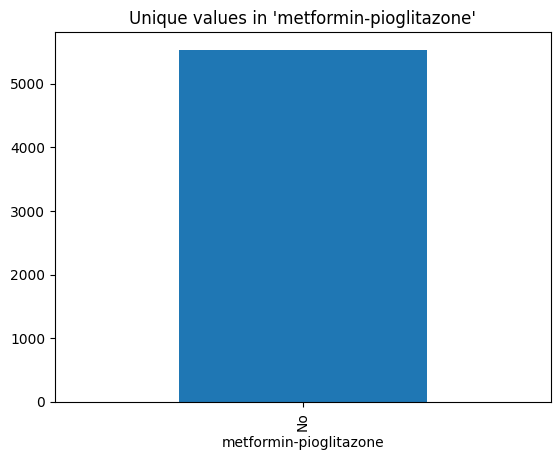

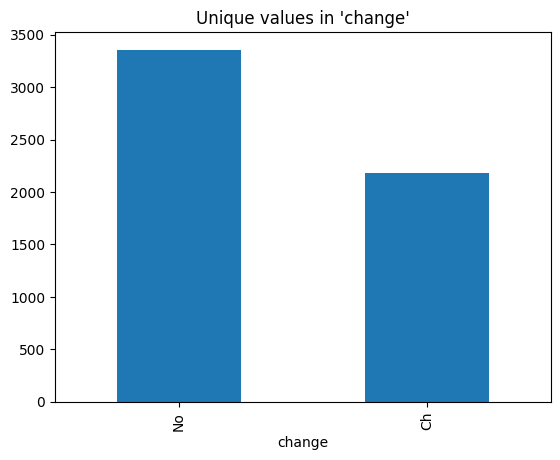

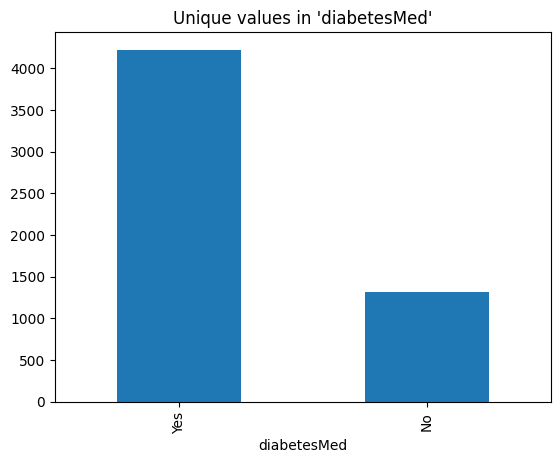

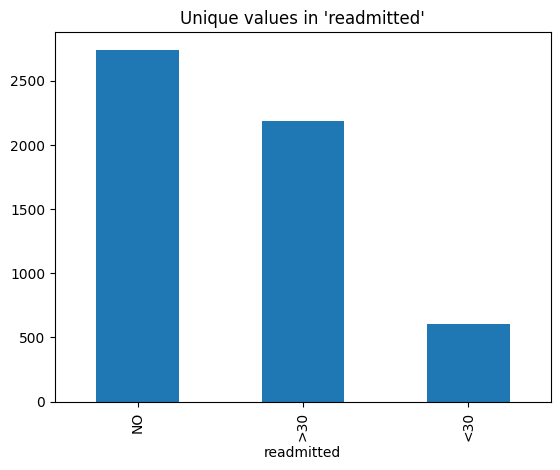

In [38]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Unique values in '{col}'")
    plt.show()


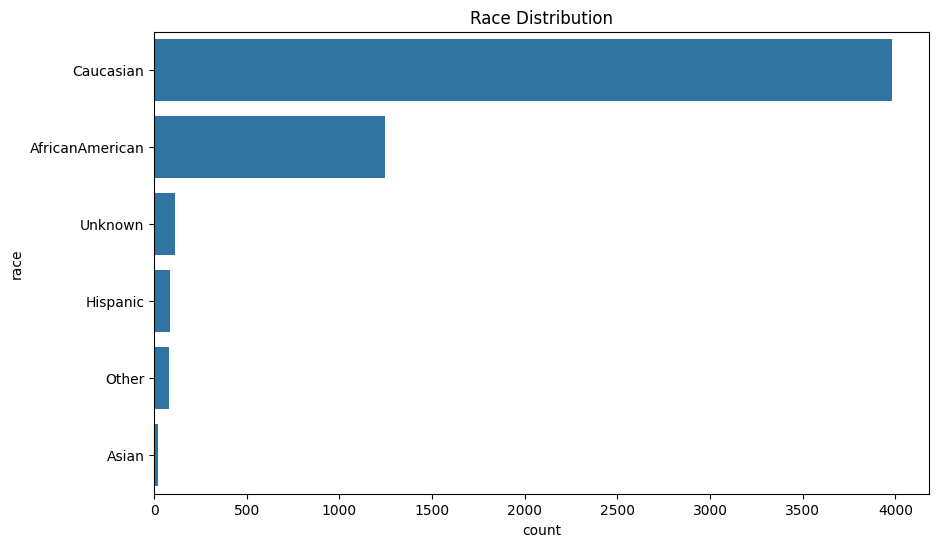

In [39]:
# Plot race
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='race', order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.show()

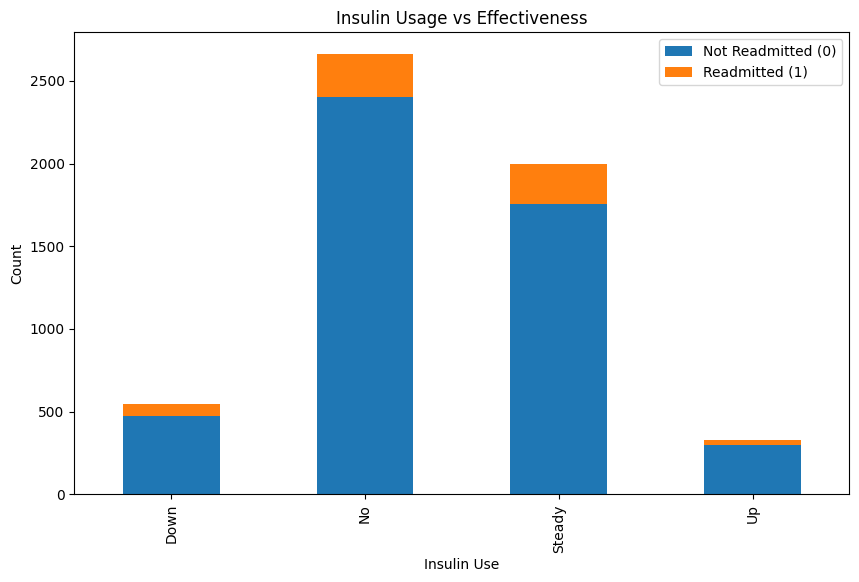

In [40]:
# Crosstab
ct_insulin = pd.crosstab(df['insulin'], df['effectiveness'])
ct_insulin.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Insulin Usage vs Effectiveness')
plt.xlabel('Insulin Use')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

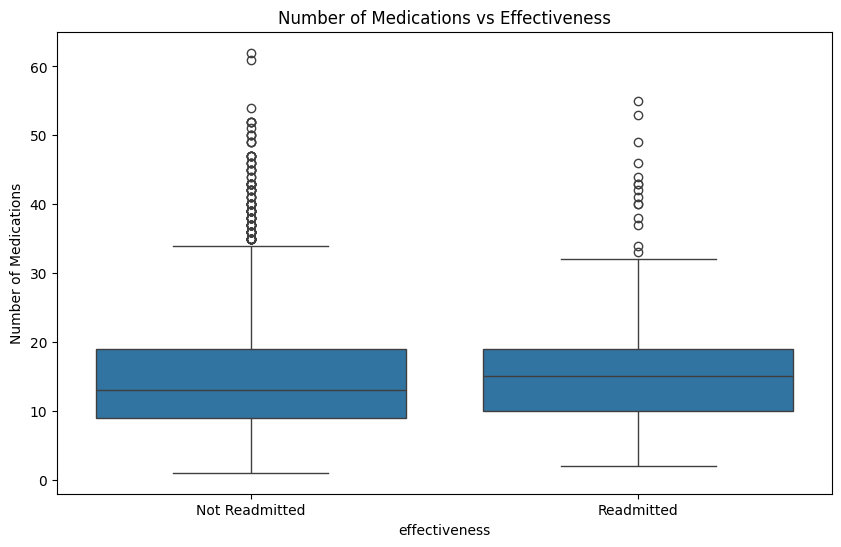

In [41]:
# Convert to numeric
df['num_medications'] = pd.to_numeric(df['num_medications'], errors='coerce')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_temp, x='effectiveness', y='num_medications')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.title('Number of Medications vs Effectiveness')
plt.ylabel('Number of Medications')
plt.show()

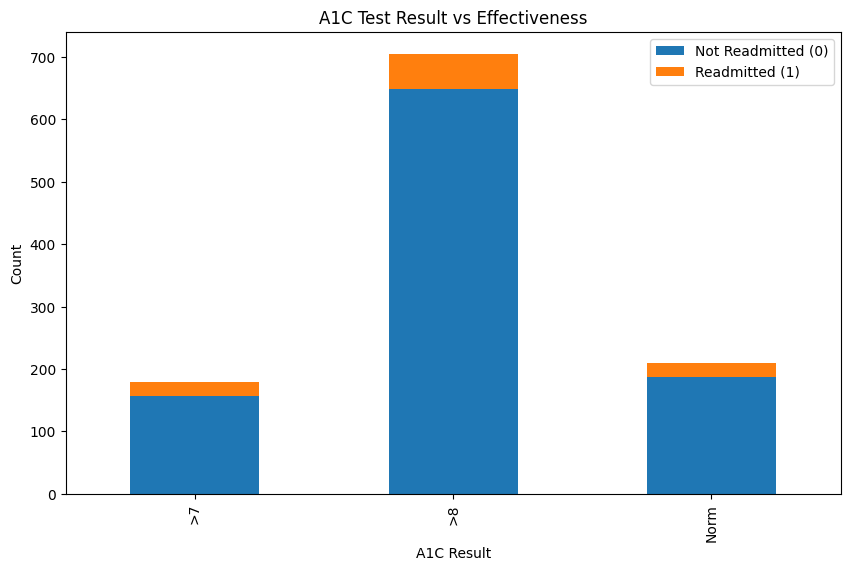

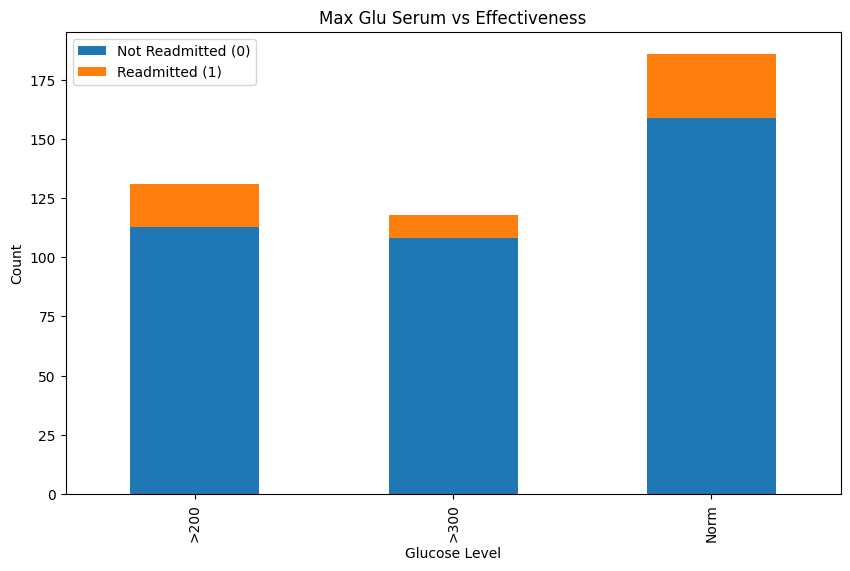

In [42]:
# A1C Result
ct_a1c = pd.crosstab(df['A1Cresult'], df['effectiveness'])
ct_a1c.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('A1C Test Result vs Effectiveness')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

# Max Glu Serum
ct_glu = pd.crosstab(df['max_glu_serum'], df['effectiveness'])
ct_glu.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Max Glu Serum vs Effectiveness')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(['Not Readmitted (0)', 'Readmitted (1)'])
plt.show()

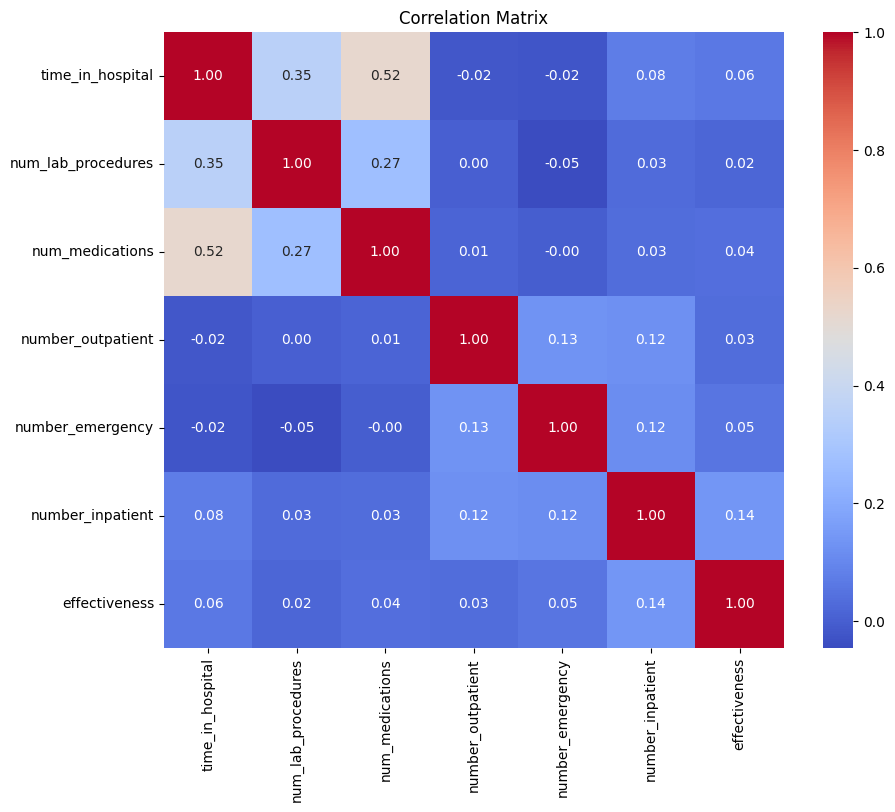

In [43]:
# Select numerical features
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

# Calculate correlation matrix
corr = df[numerical_cols + ['effectiveness']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [44]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [45]:
# Normalize numerical columns


scaler = MinMaxScaler()
numeric_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']
# If columns are missing, consider imputing or creating them based on your data understanding
# Ensure the column names in numeric_cols exactly match your DataFrame
if all(col in df.columns for col in numeric_cols):
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
else:
    print(f"Missing columns: {[col for col in numeric_cols if col not in df.columns]}")
    # Handle missing columns here (e.g., imputation, feature engineering)

Missing columns: ['bmi', 'HbA1c_level', 'blood_glucose_level']


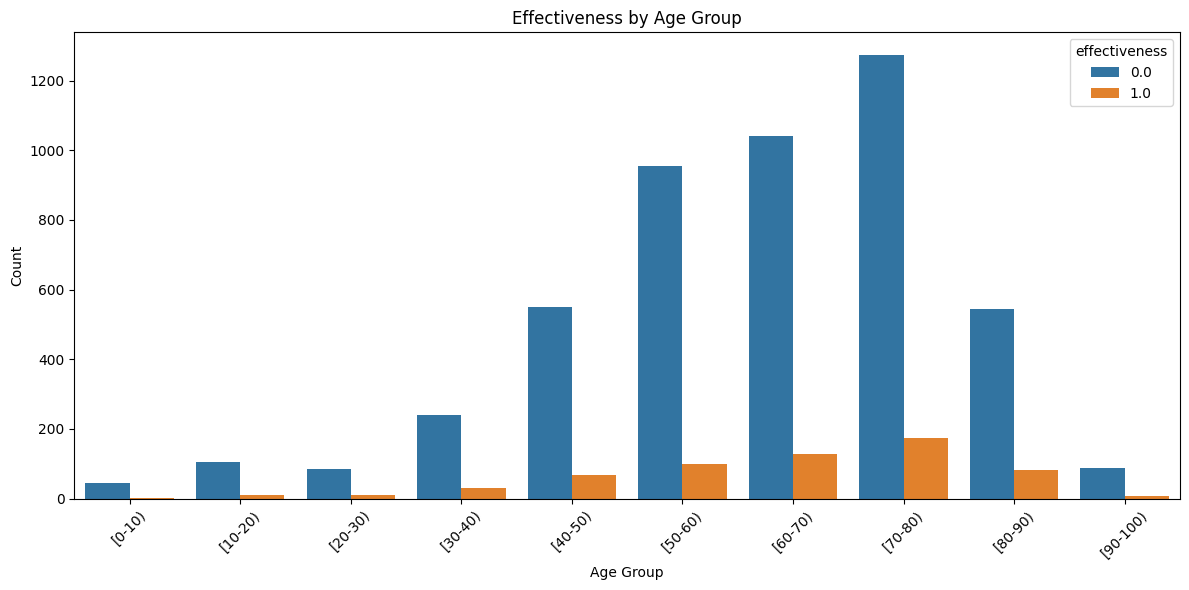

In [46]:

# STEP 5: Countplot - Age Group vs Effectiveness
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='effectiveness', order=sorted(df['age'].unique()))
plt.title('Effectiveness by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



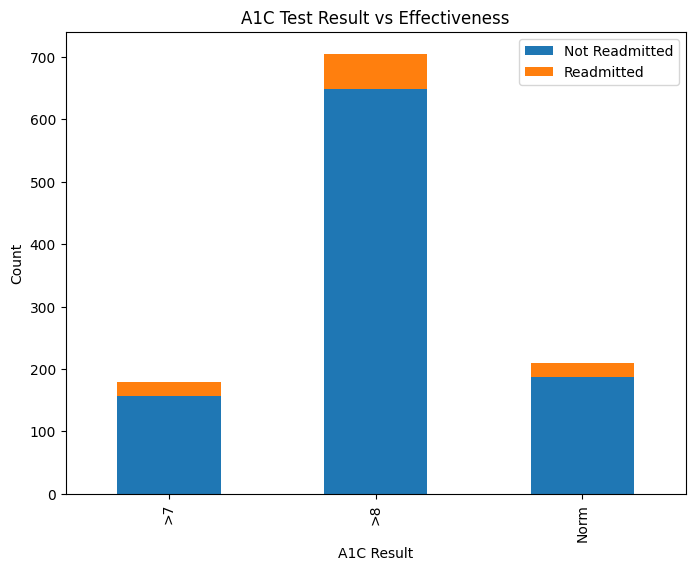

In [47]:

# STEP 6: A1C Result vs Effectiveness
ct_a1c = pd.crosstab(df['A1Cresult'], df['effectiveness'])
ct_a1c.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('A1C Test Result vs Effectiveness')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()



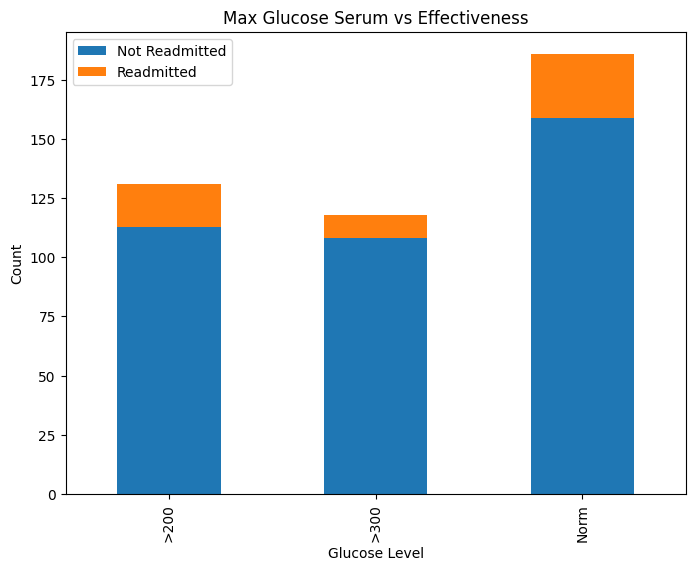

In [48]:
# STEP 7: Glucose Serum vs Effectiveness
ct_glu = pd.crosstab(df['max_glu_serum'], df['effectiveness'])
ct_glu.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Max Glucose Serum vs Effectiveness')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

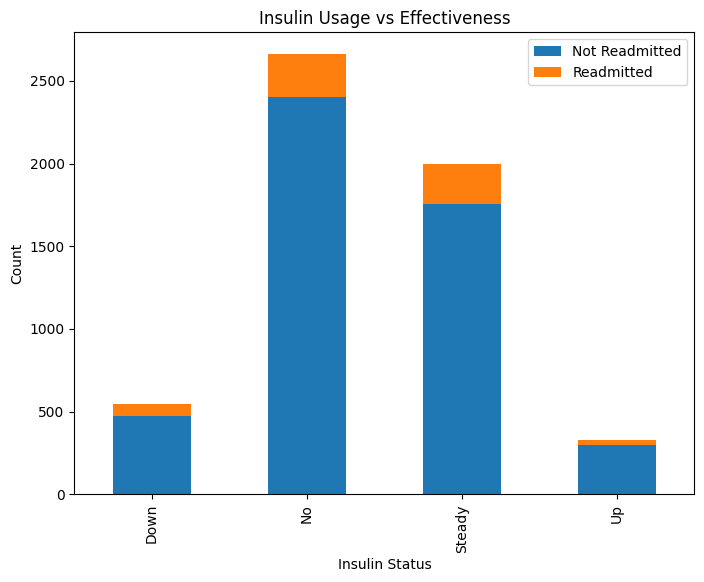

In [49]:


# STEP 8: Insulin Use vs Effectiveness
ct_insulin = pd.crosstab(df['insulin'], df['effectiveness'])
ct_insulin.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Insulin Usage vs Effectiveness')
plt.xlabel('Insulin Status')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

In [50]:
# Chi-square test for A1C result vs effectiveness


a1c_ct = pd.crosstab(df['A1Cresult'], df['effectiveness'])
chi2, p, dof, expected = chi2_contingency(a1c_ct)

print("Chi-square Test for A1Cresult vs Effectiveness")
print("Chi2 =", chi2, "  P-value =", p)
if p < 0.05:
    print("✅ Statistically significant relationship")
else:
    print("❌ No significant relationship")

# T-test (or Mann-Whitney) for num_medications vs effectiveness
from scipy.stats import mannwhitneyu

eff0 = df[df['effectiveness'] == 0]['num_medications']
eff1 = df[df['effectiveness'] == 1]['num_medications']

stat, p = mannwhitneyu(eff0, eff1)
print("\nMann-Whitney U Test for num_medications vs Effectiveness")
print("U-stat =", stat, "  P-value =", p)
if p < 0.05:
    print("✅ Significant difference in medication count between groups")
else:
    print("❌ No significant difference")

Chi-square Test for A1Cresult vs Effectiveness
Chi2 = 4.791951904285957   P-value = 0.0910837421572948
❌ No significant relationship

Mann-Whitney U Test for num_medications vs Effectiveness
U-stat = 1354878.0   P-value = 0.0001223016760173845
✅ Significant difference in medication count between groups


In [51]:
df.drop(['max_glu_serum' , 'A1Cresult'], axis=1, inplace=True)




**Modeling Phase**


In [52]:

# Step 4: Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder in case you want to inverse later

# Step 5: Define features and target
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == 1 else 0)  # Should already be 0 or 1 now after encoding


X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train LightGBM model
model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Accuracy:", acc)
print("\n📊 Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 1728, number of negative: 2700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 4428, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390244 -> initscore=-0.446287
[LightGBM] [Info] Start training from score -0.446287
✅ Accuracy: 0.6567299006323396

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.72       650
           1       0.60      0.50      0.55       457

    accuracy                           0.66      1107
   macro avg       0.64      0.63      0.64      1107
weighted avg       0.65      0.66      0.65      1107



In [53]:

# One-hot encode all categorical features
df = pd.get_dummies(df, drop_first=True)
# Clean unknowns
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
# Feature/target split
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Balance classes with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))
print(" Confusion matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.6811201445347786
Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       670
           1       0.60      0.57      0.59       437

    accuracy                           0.68      1107
   macro avg       0.67      0.66      0.66      1107
weighted avg       0.68      0.68      0.68      1107

 Confusion matrix:
 [[505 165]
 [188 249]]


In [54]:

rf = RandomForestClassifier(n_estimators=150, random_state=42)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
log = LogisticRegression(class_weight='balanced', max_iter=1000)

# Ensemble model
voting = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('log', log)
], voting='soft')

# Train
voting.fit(X_res, y_res)
y_pred = voting.predict(X_test)

# Evaluate
print("Accuracy:", voting.score(X_test, y_test))
print(" AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6766034327009937
 AUC Score: 0.6655913794870043
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       670
           1       0.59      0.61      0.60       437

    accuracy                           0.68      1107
   macro avg       0.66      0.67      0.66      1107
weighted avg       0.68      0.68      0.68      1107

 Confusion Matrix:
 [[481 189]
 [169 268]]


In [55]:

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📄 Report:\n", classification_report(y_test, y_pred))
print("🔢 Confusion matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.6811201445347786
📄 Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       670
           1       0.60      0.57      0.59       437

    accuracy                           0.68      1107
   macro avg       0.67      0.66      0.66      1107
weighted avg       0.68      0.68      0.68      1107

🔢 Confusion matrix:
 [[505 165]
 [188 249]]


In [56]:

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter tuning (you can expand grid later)
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb, params, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_res, y_res)

best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Results
print(" Final Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
 Final Accuracy: 0.6540198735320687
Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       670
           1       0.56      0.54      0.55       437

    accuracy                           0.65      1107
   macro avg       0.64      0.63      0.64      1107
weighted avg       0.65      0.65      0.65      1107

 Confusion Matrix:
 [[488 182]
 [201 236]]


In [57]:

# Handle imbalance
sm = SMOTE(random_state=42, sampling_strategy=0.8)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

# Feature Selection (optional but recommended)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_res, y_res)
X_res_sel = selector.transform(X_res)
X_test_sel = selector.transform(X_test)

# Define individual classifiers with potential hyperparameter ranges
clf1 = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.1)
clf2 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_leaf=5)
clf3 = GradientBoostingClassifier(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=5)
clf4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=150, learning_rate=0.1, max_depth=5, subsample=0.8)
clf5 = SVC(probability=True, random_state=42, kernel='rbf', C=1.0, gamma='scale')
clf6 = GaussianNB()
clf7 = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=3)
clf8 = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf9 = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(64, 32), activation='relu', solver='adam')


# Create a VotingClassifier (soft voting for probability-based classifiers)
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gb', clf3), ('xgb', clf4), ('svc', clf5),
    ('gnb', clf6), ('dt', clf7), ('knn', clf8), ('mlp', clf9)
], voting='soft')

# Train the VotingClassifier
voting_clf.fit(X_res, y_res)

# Predict with the VotingClassifier
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate the Ensemble Model
print("Ensemble Model Results:")
print("Final Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Report:\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

# --- Optional: Individual Model Evaluation (for comparison) ---
print("\n--- Individual Model Performance ---")
for name, clf in voting_clf.named_estimators_.items():
    clf.fit(X_res, y_res)
    y_pred_individual = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_individual)
    print(f"{name}: Accuracy = {accuracy:.4f}")


# Example of tuning XGBoost further (if you want to focus on it)
param_grid_xgb = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.01],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                        scoring='accuracy', verbose=1, n_jobs=-1)
grid_xgb.fit(X_res, y_res)
best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("\n--- Tuned XGBoost Results ---")
print(" Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Tuned XGBoost Report:\n", classification_report(y_test, y_pred_best_xgb))
print(" Tuned XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Best XGBoost Parameters:", grid_xgb.best_params_)

Ensemble Model Results:
Final Accuracy: 0.6350496838301717
Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       670
           1       0.61      0.22      0.32       437

    accuracy                           0.64      1107
   macro avg       0.62      0.56      0.53      1107
weighted avg       0.63      0.64      0.58      1107

Confusion Matrix:
 [[609  61]
 [343  94]]

--- Individual Model Performance ---
lr: Accuracy = 0.5194
rf: Accuracy = 0.6052
gb: Accuracy = 0.6188
xgb: Accuracy = 0.6134
svc: Accuracy = 0.6052
gnb: Accuracy = 0.6052
dt: Accuracy = 0.6341
knn: Accuracy = 0.5637
mlp: Accuracy = 0.5167
Fitting 3 folds for each of 72 candidates, totalling 216 fits

--- Tuned XGBoost Results ---
 Tuned XGBoost Accuracy: 0.6269196025293586
Tuned XGBoost Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       670
           1       0.58      0.20      0.29       437

In [58]:


# --- XGBoost with Class Weights and F1 Scoring ---
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                    scale_pos_weight=scale_pos_weight)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_xgb_f1 = GridSearchCV(xgb, param_grid_xgb, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                           scoring='f1', verbose=1, n_jobs=-1)
grid_xgb_f1.fit(X_res, y_res)
best_xgb_f1 = grid_xgb_f1.best_estimator_
y_pred_xgb_f1 = best_xgb_f1.predict(X_test)

print("\n--- Tuned XGBoost (Optimized for F1) ---")
print("✅ Final Accuracy:", accuracy_score(y_test, y_pred_xgb_f1))
print("✅ F1 Score:", f1_score(y_test, y_pred_xgb_f1))
print("📄 Report:\n", classification_report(y_test, y_pred_xgb_f1))
print("🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_f1))
print("🚀 Best XGBoost Parameters:", grid_xgb_f1.best_params_)

# --- LightGBM with F1 Scoring ---
lgbm = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_lgbm_f1 = GridSearchCV(lgbm, param_grid_lgbm, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                            scoring='f1', verbose=1, n_jobs=-1)
grid_lgbm_f1.fit(X_res, y_res)
best_lgbm_f1 = grid_lgbm_f1.best_estimator_
y_pred_lgbm_f1 = best_lgbm_f1.predict(X_test)

print("\n--- Tuned LightGBM (Optimized for F1) ---")
print("✅ Final Accuracy:", accuracy_score(y_test, y_pred_lgbm_f1))
print("✅ F1 Score:", f1_score(y_test, y_pred_lgbm_f1))
print("📄 Report:\n", classification_report(y_test, y_pred_lgbm_f1))
print("🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_f1))
print("🚀 Best LightGBM Parameters:", grid_lgbm_f1.best_params_)

# --- Ensemble Voting Classifier (XGBoost, LightGBM, RandomForest, Logistic Regression) ---
clf1 = best_xgb_f1
clf2 = best_lgbm_f1
clf3 = RandomForestClassifier(random_state=42)
clf4 = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # Using class weights here too

voting_clf_f1 = VotingClassifier(estimators=[('xgb', clf1), ('lgbm', clf2), ('rf', clf3), ('lr', clf4)], voting='soft')
voting_clf_f1 = voting_clf_f1.fit(X_res, y_res)
y_pred_vote_f1 = voting_clf_f1.predict(X_test)

print("\n--- Ensemble Voting Classifier (Optimized for F1) ---")
print("✅ Final Accuracy:", accuracy_score(y_test, y_pred_vote_f1))
print("✅ F1 Score:", f1_score(y_test, y_pred_vote_f1))
print("📄 Report:\n", classification_report(y_test, y_pred_vote_f1))
print("🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote_f1))

Fitting 3 folds for each of 108 candidates, totalling 324 fits

--- Tuned XGBoost (Optimized for F1) ---
✅ Final Accuracy: 0.6269196025293586
✅ F1 Score: 0.294017094017094
📄 Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       670
           1       0.58      0.20      0.29       437

    accuracy                           0.63      1107
   macro avg       0.61      0.55      0.52      1107
weighted avg       0.61      0.63      0.57      1107

🔢 Confusion Matrix:
 [[608  62]
 [351  86]]
🚀 Best XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 2143, number of negative: 2679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

In [64]:
from sklearn.model_selection import cross_val_score # Import cross_val_score

# Feature Selection (optional but recommended)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_res, y_res)
X_res_sel = selector.transform(X_res)
X_test_sel = selector.transform(X_test)

# Define top models
clf1 = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.1)
clf2 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_leaf=5)
clf3 = GradientBoostingClassifier(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=5)
clf4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                     n_estimators=150, learning_rate=0.1, max_depth=5, subsample=0.8)
clf5 = SVC(probability=True, random_state=42, kernel='rbf', C=1.0, gamma='scale')
clf6 = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)

# Voting classifier with weights (focus on best models)
voting_clf = VotingClassifier(estimators=[
    ('xgb', clf4),
    ('lgbm', clf6),
    ('rf', clf2),
    ('gb', clf3),
    ('svc', clf5),
    ('lr', clf1)
], voting='soft', weights=[3, 3, 2, 2, 1, 1])

# Train the voting classifier
voting_clf.fit(X_res_sel, y_res)
# Feature Selection (optional but recommended)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_res, y_res)
X_res_sel = selector.transform(X_res)
X_test_sel = selector.transform(X_test)

# Define top models
clf1 = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.1)
clf2 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_leaf=5)
clf3 = GradientBoostingClassifier(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=5)
clf4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                     n_estimators=150, learning_rate=0.1, max_depth=5, subsample=0.8)
clf5 = SVC(probability=True, random_state=42, kernel='rbf', C=1.0, gamma='scale')
clf6 = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)

# Voting classifier with weights (focus on best models)
voting_clf = VotingClassifier(estimators=[
    ('xgb', clf4),
    ('lgbm', clf6),
    ('rf', clf2),
    ('gb', clf3),
    ('svc', clf5),
    ('lr', clf1)
], voting='soft', weights=[3, 3, 2, 2, 1, 1])

# Train the voting classifier
voting_clf.fit(X_res_sel, y_res)

# Predict and evaluate
y_pred = voting_clf.predict(X_test_sel)
print("✅ Final Accuracy:", accuracy_score(y_test, y_pred))
print("📄 Report:\n", classification_report(y_test, y_pred))
print("🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


cv_scores = cross_val_score(voting_clf, X_res_sel, y_res, cv=5, scoring='accuracy')
print("\n🧪 Cross-Validation Accuracy (mean):", np.mean(cv_scores))

# Compare individual models
print("\n--- Individual Model Performance ---")
for name, clf in voting_clf.named_estimators_.items():
    clf.fit(X_res_sel, y_res)
    y_pred_ind = clf.predict(X_test_sel)
    print(f"{name}: Accuracy = {accuracy_score(y_test, y_pred_ind):.4f}")

[LightGBM] [Info] Number of positive: 2143, number of negative: 2679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 4822, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444421 -> initscore=-0.223237
[LightGBM] [Info] Start training from score -0.223237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [65]:
#ML Flow
mlflow.set_experiment("Diabetes Readmission Prediction")



2025/05/10 10:14:37 INFO mlflow.tracking.fluent: Experiment with name 'Diabetes Readmission Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/885434260352572039', creation_time=1746872077677, experiment_id='885434260352572039', last_update_time=1746872077677, lifecycle_stage='active', name='Diabetes Readmission Prediction', tags={}>

In [66]:
with mlflow.start_run(run_name="LightGBM Classifier"):
    # Step 8: Train LightGBM model
    model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
    model.fit(X_train, y_train)

    # Step 9: Predict and evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(" Accuracy:", acc)
    print("\n Classification Report:\n", report)


    mlflow.log_param("model_type", "LightGBM")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("learning_rate", 0.05)


    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)


    mlflow.sklearn.log_model(model, artifact_path="lightgbm_model")
    print(" Model and metrics logged to MLflow.")

[LightGBM] [Info] Number of positive: 1748, number of negative: 2679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 4427, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394850 -> initscore=-0.426971
[LightGBM] [Info] Start training from score -0.426971
 Accuracy: 0.6052393857271906

 Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.75       670
           1       0.00      0.00      0.00       437

    accuracy                           0.61      1107
   macro avg       0.30      0.50      0.38      1107
weighted avg       0.37      0.61      0.46      1107



2025/05/10 10:14:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Model and metrics logged to MLflow.


In [67]:
with mlflow.start_run(run_name="RandomForest with SMOTE"):

    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(X_res, y_res)


    y_pred = rf.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)


    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("use_SMOTE", True)


    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)


    mlflow.sklearn.log_model(rf, "random_forest_model")

    print(f"Logged to MLflow - Accuracy: {acc:.4f}, F1: {f1:.4f}")

2025/05/10 10:14:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged to MLflow - Accuracy: 0.6052, F1: 0.0000
